In [2]:
import numpy as np
import math, os
import helper_fcns as hf
import autoreload
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import seaborn as sns
sns.set(style='ticks')
% matplotlib inline

import pdb

# constants - directories
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/sach-data/';
data_name = 'sachData.npy'

In [3]:
sdp = np.load(data_loc + data_name).item()

### Some simple plotting

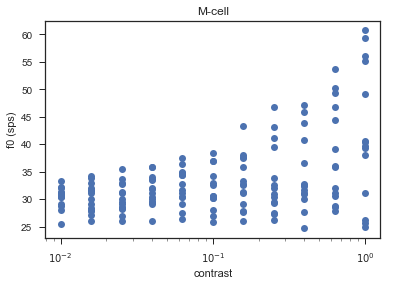

In [6]:
cellNum = 31;
plt.semilogx(sdp[cellNum-1]['data']['cont'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('contrast'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

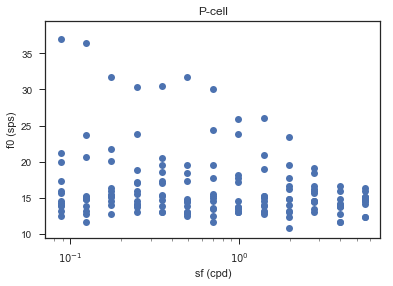

In [32]:
cellNum = 15;
plt.semilogx(sdp[cellNum-1]['data']['sf'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

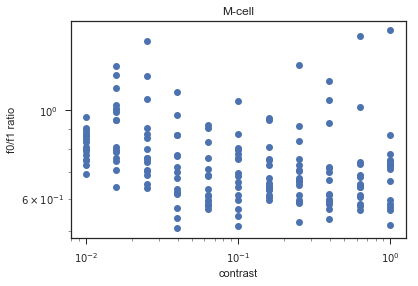

In [33]:
cellNum = 1;
plt.loglog(sdp[cellNum-1]['data']['cont'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('contrast'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

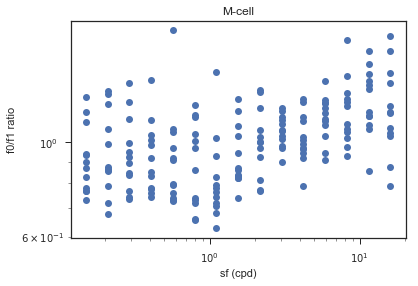

In [34]:
cellNum = 2;
plt.loglog(sdp[cellNum-1]['data']['sf'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

### Now, organized plotting

Spatial frequency tuning

In [88]:
autoreload.reload(hf);

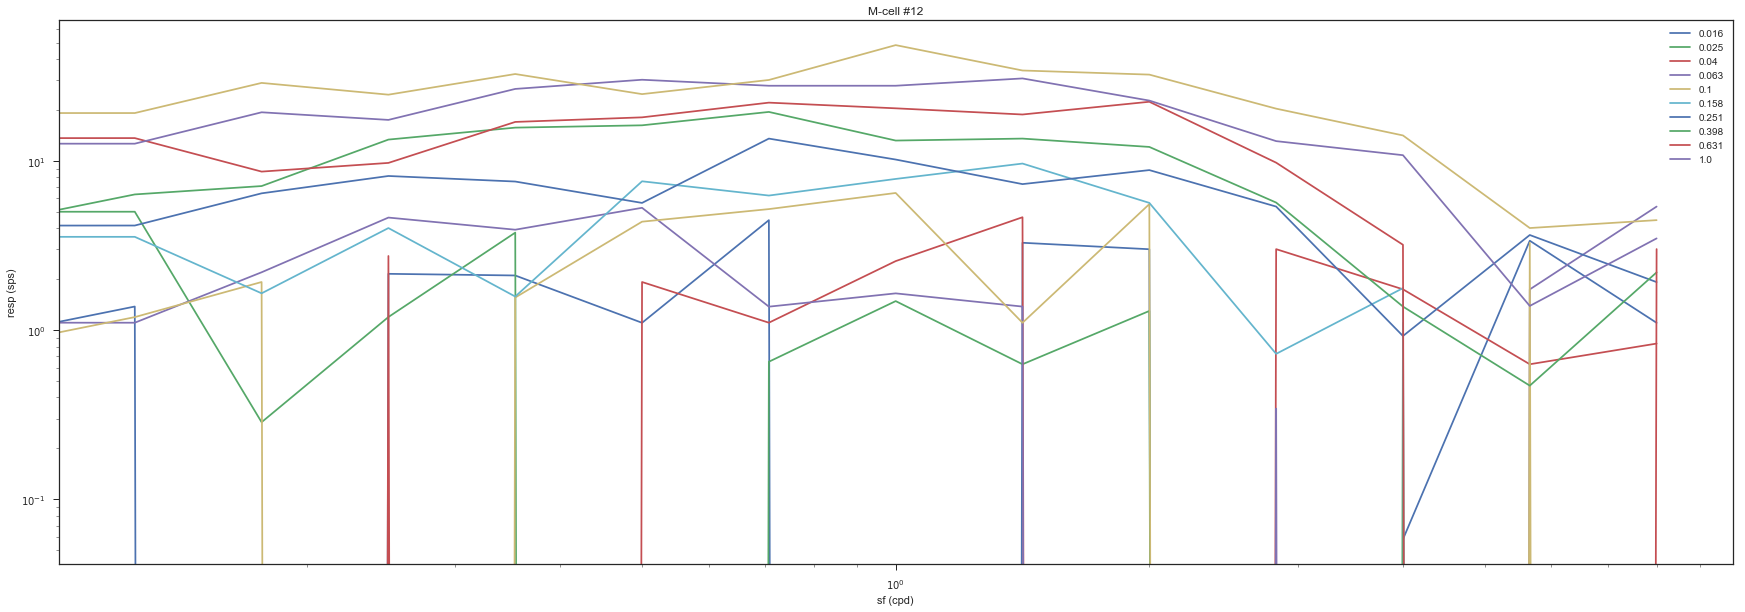

In [4]:
cellNum = 12;
data = sdp[cellNum-1]['data'];
resps, stims = hf.tabulateResponses(data);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 10))
for i in range(len(cons)):
    plt.loglog(sfs, f0['mean'][i, :]-baseline, '-');
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [6]:
sdp[0]['cellType']

'M-cell'

Response versus contrast curves

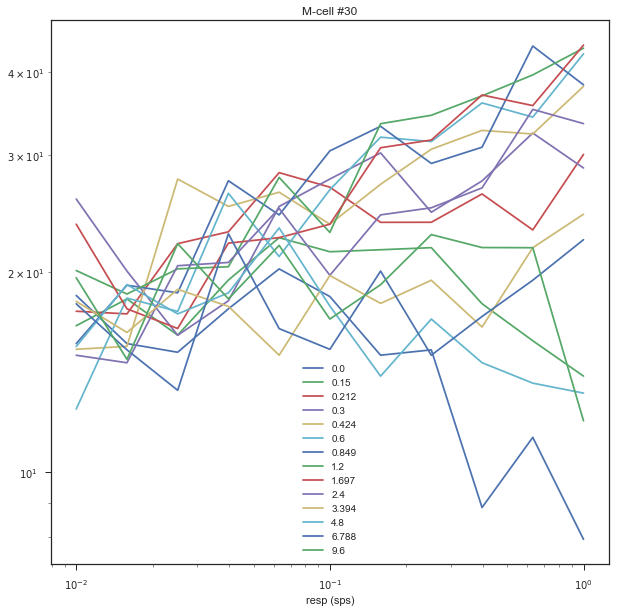

In [107]:
cellNum = 30;
resps, stims = hf.tabulateResponses(sdp[cellNum-1]['data']);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(10, 10))
for i in range(len(sfs)):
    plt.loglog(cons, f0['mean'][:, i]-baseline, '-');
#     plt.errorbar(cons, f0['mean'][:, i], f0['sem'][:, i], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('con (%)');
plt.xlabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in sfs], loc=0);